This tutorial will cover how to make coeval maps with Zeus, both of T21 and densities with the right correlations and nonlinearities/nonlocalities. Buckle up!

In [2]:
#this cell is basically running all the background we need to have the statistics at all z and k
import zeus21
from matplotlib import pyplot as plt
import numpy as np


#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

#and the user parameters
UserParams = zeus21.User_Parameters(precisionboost=1.2)


CosmoParams_input = zeus21.Cosmo_Parameters_Input(zmin_CLASS=5.0) #make sure to provide zmin_CLASS lower than standard (5.0) if you want lower z results (eg HMFs)
CosmoParams, ClassyCosmo, CorrFclass , HMFintclass =  zeus21.cosmo_wrapper(UserParams, CosmoParams_input)

AstroParams = zeus21.Astro_Parameters(UserParams, CosmoParams) 
ZMIN = 10.0 #down to which z we compute the evolution
CoeffStructure = zeus21.get_T21_coefficients(UserParams, CosmoParams, ClassyCosmo, AstroParams, HMFintclass, zmin=ZMIN)

RSDMODE = 1 #which RSD mode you want, 0 is no RSDs (real space), 1 is spherical (as simulations usually take), 2 is mu~1 (outside the wedge, most relevant for observations)
PS21 = zeus21.Power_Spectra(UserParams, CosmoParams, AstroParams, ClassyCosmo, CorrFclass, CoeffStructure, RSD_MODE = RSDMODE)

We can make different types of map. 

First let's make a very rough map of just T21, where we assume it's a gaussian variable. It's guaranteed to have the right power spectrum, but it's not a great representation of the field overall because it ignores higher order correlations. This is KIND=0

1.0000000000000004


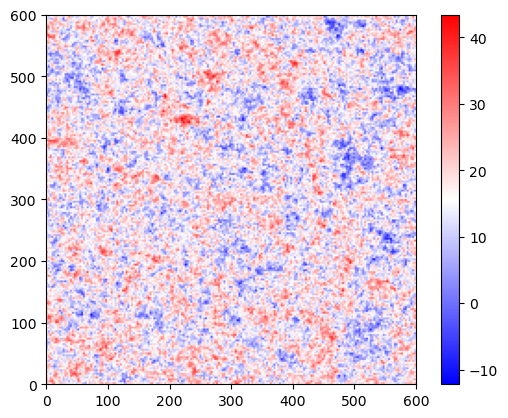

In [3]:
Mapz11 = zeus21.CoevalMaps(CoeffStructure, PS21, 11., KIND=0)

print(np.mean(Mapz11.T21map)/Mapz11.T21global) #should have the correct mean

_islice = 0
plt.imshow(Mapz11.T21map[_islice],extent=(0,Mapz11.Lbox,0,Mapz11.Lbox),cmap='bwr') 
plt.colorbar()
plt.show()

Now let's up the ante and make more realistic maps for both density and T21. In this case we keep track of their correlation, including nonlocalities. We generate a T21linear map that depends on delta, and then the nonlinearities are taken into account by an extra lognormal component. Still no xa, Tk, or xHI. This is achieved with KIND = 1. It takes longer because we need more FFTs.

1.0000983199818518


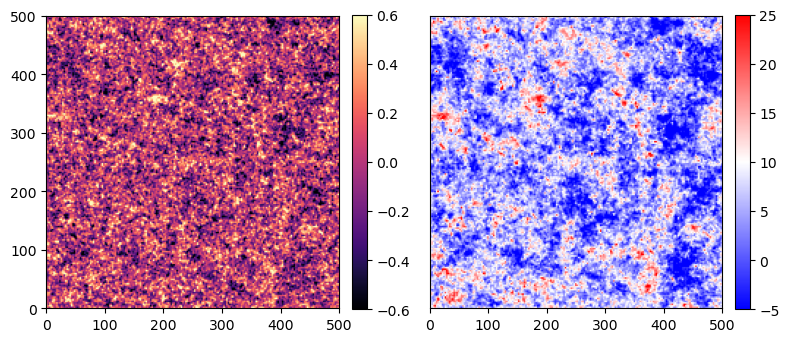

In [4]:
Mapz12 = zeus21.CoevalMaps(CoeffStructure, PS21, 12., KIND=1,Lbox=500,Nbox=200) #can set Lbox, Nbox, and seed


print(np.mean(Mapz12.T21map)/Mapz12.T21global) #should have the correct mean

_islice = 0


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

im=ax[0].imshow(Mapz12.deltamap[_islice],extent=(0,Mapz12.Lbox,0,Mapz12.Lbox),cmap='magma',vmin=-0.6,vmax=0.6)
cbar1 = fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)

im=ax[1].imshow(Mapz12.T21map[_islice],extent=(0,Mapz12.Lbox,0,Mapz12.Lbox),cmap='bwr',vmin=-5,vmax=25)
ax[1].set_yticks([])
cbar2 = fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)


fig.tight_layout()
plt.show()


Incoming: 

-all components (xa, Tk, xHI...) approximated, and the full T21 from them

-Full calculation with no shortcuts

-Lightcones and nongaussianities

-Galaxy populations in 3D

and more!